<a href="https://colab.research.google.com/github/blwolhppt/ML/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №3**

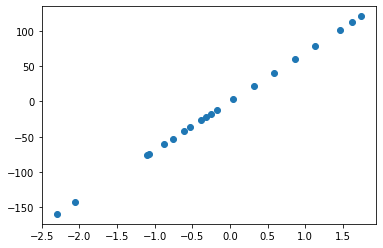

error after gradient descent: 4.368326778742925


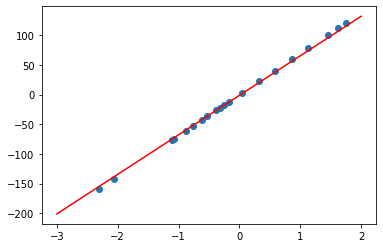

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

x.head()
y.head()

plt.figure()
plt.scatter(x, y)
plt.show()


class Model(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors 


hyp = Model()
steps, errors = hyp.fit(x, y, max_steps=2750)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

**1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.**

b0=-0.67, b1= 2.02, loss:  239.39
b0=-0.13, b1= 0.09, loss:  252.60
b0=-1.47, b1= 0.07, loss:  254.55
b0=-1.32, b1=-0.73, loss:  260.22
b0= 0.39, b1= 0.40, loss:  249.73
b0= 2.57, b1=-1.88, loss:  264.34
b0=-1.13, b1= 0.42, loss:  251.52
b0= 0.53, b1=-1.50, loss:  263.60
b0=-0.16, b1=-0.32, loss:  255.69
b0=-0.88, b1=-0.45, loss:  257.54


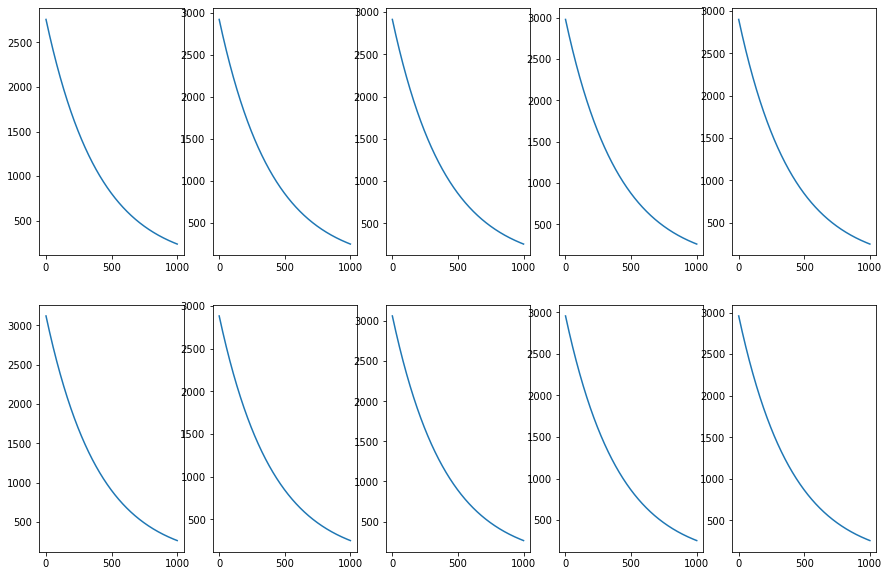

In [ ]:
import itertools
fig, ax = plt.subplots(2, 5, figsize=(15, 10))

for i in itertools.product([0, 1], [0, 1, 2, 3, 4]):
    b0, b1 = np.random.randn(2)
    model = Model(b0, b1)
    print(f'b0={b0: .2f}, b1={b1: .2f}', end=', ')
    steps, losses = model.fit(x, y, max_steps=1000)
    print(f'loss: {model.error(x, y): .2f}')
    ax[i].plot(steps, losses)
plt.show()

**2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.**


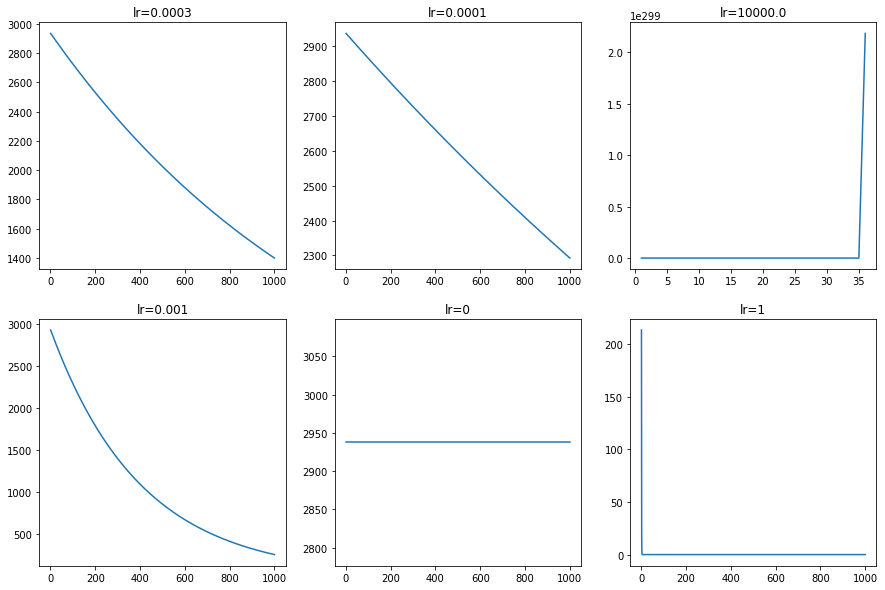

In [ ]:
import itertools
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for lr, i in zip([3e-4, 1e-4, 1e4, 1e-3, 0, 1], 
                 itertools.product([0, 1], [0, 1, 2])):
    model = Model()
    steps, losses = model.fit(x, y, alpha=lr, max_steps=1000)
    ax[i].plot(steps, losses)
    ax[i].set_title(f'lr={lr}')

plt.show()

Ответ: расходится при большом альфа 

**3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame.**


**4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.**

**5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.**

**6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать.**

**7. Добавьте к классу модели метод рисования графиков.**

Все вместе сделано

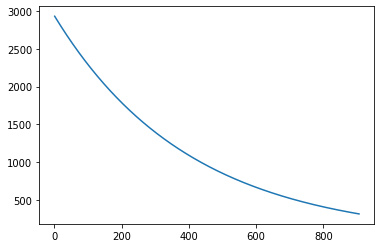

In [ ]:
class ModelDF(object):
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
            Y = Y.to_numpy()
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
            Y = Y.to_numpy()
        steps, errors = [], []
        step = 0      
        last_err = 1e10  
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if max(alpha * dJ0, alpha * dJ1) < 1e-6:
                break
            if new_err > last_err:
                alpha /= 2
            last_err = new_err
 
        return steps, errors
      
    def graf(self, steps, losses):
        plt.plot(steps, losses) 

        


x = pd.DataFrame(x)
y = pd.DataFrame(y)

model = ModelDF()
steps, losses = model.fit(x, y)
model.graf(steps, losses)